In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Upload data files
from google.colab import files
uploaded = files.upload()


Saving QVI_transaction_data.csv to QVI_transaction_data.csv
Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv


# New Section

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


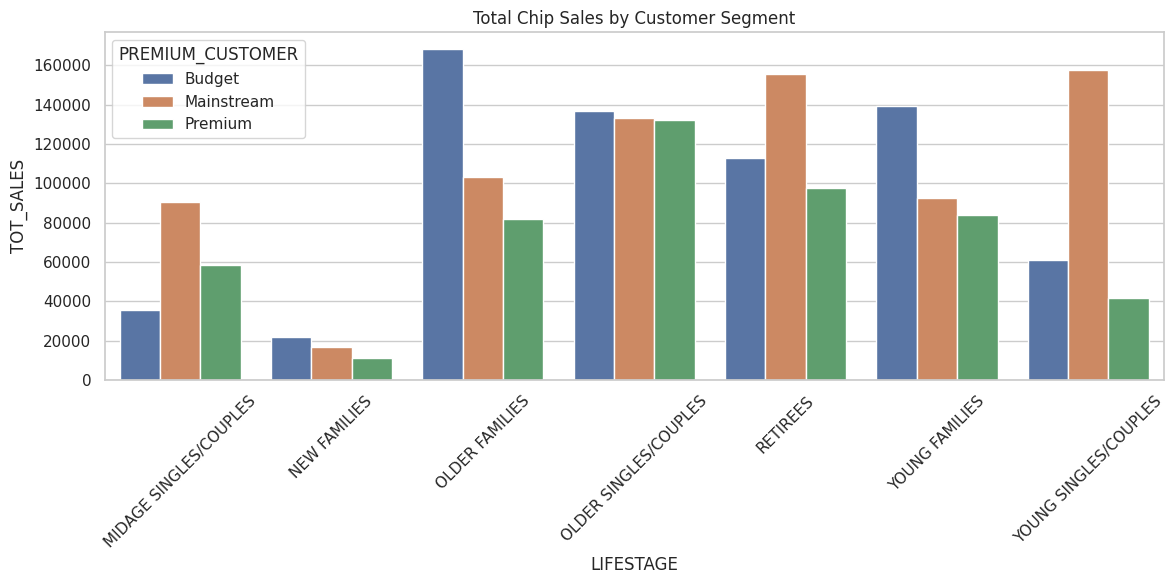

In [15]:
transactions = pd.read_csv("QVI_transaction_data.csv")
demographics = pd.read_csv("QVI_purchase_behaviour.csv")

# Merge using customer ID
df = pd.merge(transactions, demographics, on='LYLTY_CARD_NBR')
print(df.columns)

df.head()
# Check date format and convert
df['DATE'] = pd.to_datetime(df['DATE'])

# Check for nulls
print(df.isnull().sum())

# Remove negative or 0 quantity
df = df[df['PROD_QTY'] > 0]
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(float)
df['BRAND'] = df['PROD_NAME'].str.split().str[0]
df['SPEND_PER_PACK'] = df['TOT_SALES'] / df['PROD_QTY']
grouped = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'PROD_QTY': 'sum',
    'TOT_SALES': 'sum',
    'SPEND_PER_PACK': 'mean'
}).reset_index()

grouped.sort_values(by='TOT_SALES', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title("Total Chip Sales by Customer Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# New Section